In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from keras.layers import Concatenate, concatenate
from keras.layers.normalization import BatchNormalization
import numpy as np
import h5py
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../input/heartcsv/heart.csv')
df = shuffle(df)

In [3]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
194   60    1   2       140   185    0        0      155      0      3.0   
132   42    1   1       120   295    0        1      162      0      0.0   
239   35    1   0       126   282    0        0      156      1      0.0   
68    44    1   1       120   220    0        1      170      0      0.0   
115   37    0   2       120   215    0        1      170      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
301   57    1   0       130   131    0        1      115      1      1.2   
177   64    1   2       140   335    0        1      158      0      0.0   
274   47    1   0       110   275    0        0      118      1      1.0   
251   43    1   0       132   247    1        0      143      1      0.1   
181   65    0   0       150   225    0        0      114      0      1.0   

     slope  ca  thal  target  
194      1   0     2       0  
132      2   0     2     

In [4]:
dataset = df.values

In [5]:
X = dataset[:,0:13]
Y = dataset[:,13]

In [6]:
X = preprocessing.normalize(X)

In [7]:
Y

array([0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [9]:
model = Sequential()
model.add(Dense(26, activation='sigmoid', input_shape=(13,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 27        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile( optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'] )


In [11]:
hist = model.fit(X_train, y_train, batch_size=4, epochs=10,shuffle=True)

Epoch 1/10
227/227 [==============================] - 1s 6ms/step - loss: 0.6915 - accuracy: 0.5286
Epoch 2/10
227/227 [==============================] - 0s 726us/step - loss: 0.6895 - accuracy: 0.5419
Epoch 3/10
227/227 [==============================] - 0s 768us/step - loss: 0.6894 - accuracy: 0.5419
Epoch 4/10
227/227 [==============================] - 0s 869us/step - loss: 0.6884 - accuracy: 0.5419
Epoch 5/10
227/227 [==============================] - 0s 711us/step - loss: 0.6882 - accuracy: 0.5419
Epoch 6/10
227/227 [==============================] - 0s 686us/step - loss: 0.6882 - accuracy: 0.5419
Epoch 7/10
227/227 [==============================] - 0s 783us/step - loss: 0.6872 - accuracy: 0.5419
Epoch 8/10
227/227 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5419
Epoch 9/10
227/227 [==============================] - 0s 692us/step - loss: 0.6863 - accuracy: 0.5419
Epoch 10/10
227/227 [==============================] - 0s 709us/step - loss: 0.6863 - 

In [12]:
model.evaluate(X_test, y_test)[1]


76/76 [==============================] - 0s 443us/step


0.5526315569877625

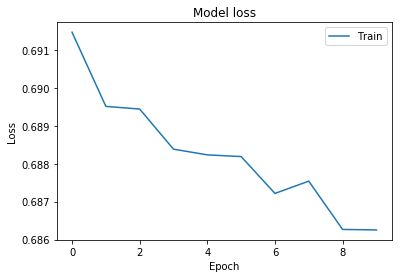

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\n Test loss: ', test_loss)



Test accuracy: 0.5526315569877625

 Test loss:  0.6819725883634467


In [37]:
from sklearn.metrics import confusion_matrix 

In [41]:
class NeuralNetwork(Sequential):
    
    def __init__(self, child_weights=None):
        super().__init__()
        if child_weights is None:
            layer1 = Dense(26, input_shape=(13,), activation='sigmoid')
            layer2 = Dense(1, activation='sigmoid')
            self.add(layer1)
            self.add(layer2)
        else:
            self.add(
                Dense(
                    26,
                    input_shape=(13,),
                    activation='sigmoid',
                    weights=[child_weights[0], np.zeros(26)])
                )
            self.add(
                Dense(
                 1,
                 activation='sigmoid',
                 weights=[child_weights[1], np.zeros(1)])
            )

#     def forward_propagation(self, X_train, y_train):
#         y_hat = self.predict(X_train)
#         self.fitness = accuracy_score(y_train, y_hat.round())

    def compile_train(self, epochs):
        self.compile(
                      optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
                      )
        self.fit(X_train, y_train, epochs=epochs)

    #Midterm change
    def forward_propagation(self, X_train, y_train):
        y_hat = self.predict(X_train)
        # Compute fitness score
        confusionMatrix = confusion_matrix(y_train,y_hat.round())
        a = confusionMatrix[0][1]
        b = confusionMatrix[1][0]
        self.fitness = calculateFitness(N1, N2, a, b)

        


In [42]:
def calculateFitness(N1, N2, a, b):
        return (N1 + N2) / (1 + a*N2 + b*N1)
    
def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut >= .5:
        child_weights[selection] *= random.randint(2, 5)
    else:
        pass
    
##Midterm change start
def mutation_mod(pool):
    temp = []
    count = 0;
    for network in pool:
        child_weights = []
        
        for layer in network.layers:
            child_weights.append(layer.get_weights()[0])
        
        
        mut = random.uniform(0, 1)
        if count < 10 and mut < 0.3:
            for x in range(0,2):
                child_weights[x] *= random.randint(0,5)
        elif mut > 0.3:
            for x in range(0,2):
                child_weights[x] *= random.randint(0,5)
                
        child = NeuralNetwork(child_weights)
        temp.append(child)
        
    return temp
##Midterm change end

def dynamic_crossover(network1, network2):
    network1_weights = []
    network2_weights = []
    child_weights = []
    for layer in network1.layers:
        network1_weights.append(layer.get_weights()[0])

    for layer in network2.layers:
        network2_weights.append(layer.get_weights()[0])

    for i in range(0, len(network1_weights)):
        split = random.randint(0, np.shape(network1_weights[i])[1]-1)
        for j in range(split, np.shape(network1_weights[i])[1]-1):
            network1_weights[i][:, j] = network2_weights[i][:, j]

        child_weights.append(network1_weights[i])
        
    child = NeuralNetwork(child_weights)
    return child

In [43]:
networks = []
pool = []
generation = 0
n = 20

##Midterm change
N1 = y_train[y_train == 0].shape[0]
N2 = y_train[y_train == 1].shape[0]
##Midterm change end


for i in range(0, n):
    networks.append(NeuralNetwork())
    
max_fitness = 0

optimal_weights = []

while max_fitness < .8 and generation<15:
    
    generation += 1
    print('Generation: ', generation)

    for network in networks:
        network.forward_propagation(X_train, y_train)
        pool.append(network)

    networks.clear()
    
##Midterm change start
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()
    mutatedPool = mutation_mod(pool)
    pool.clear()
    
    for network in mutatedPool:
        network.forward_propagation(X_train, y_train)
        pool.append(network)
    
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()
##Midterm change end

    for i in range(0,5):
        networks.append(pool[i])
        
    for i in range(0, len(pool)):
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness
            print('Max Fitness: ', max_fitness)
            optimal_weights = []
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])

    for i in range(0, 5):
        for j in range(0, 2):
            temp = dynamic_crossover(pool[i], random.choice(pool))
            networks.append(temp)

    
network = NeuralNetwork(optimal_weights)
network.compile_train(10)

y_hat = network.predict(X_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_hat.round()))

Generation:  1
Max Fitness:  0.017744078793089972
Generation:  2
Generation:  3
Max Fitness:  0.023113735872110783
Generation:  4
Generation:  5
Max Fitness:  0.026282273937709853
Generation:  6
Max Fitness:  0.02640455973013842
Max Fitness:  0.02666196852243364
Max Fitness:  0.02739230119464221
Generation:  7
Max Fitness:  0.02853192559074912
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Epoch 1/10
227/227 [==============================] - 0s 548us/step - loss: 171.5218 - accuracy: 0.6960
Epoch 2/10
227/227 [==============================] - 0s 111us/step - loss: 171.3048 - accuracy: 0.6960
Epoch 3/10
227/227 [==============================] - 0s 121us/step - loss: 171.1592 - accuracy: 0.6960
Epoch 4/10
227/227 [==============================] - 0s 122us/step - loss: 171.0100 - accuracy: 0.6960
Epoch 5/10
227/227 [==============================] - 0s 107us/step - loss: 170.8752 - accuracy: 0.6960
Epoch 6/